In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-a-more-diverse-dataset/train.csv
/kaggle/input/spam-or-ham/spam (or) ham.csv
/kaggle/input/sms-spam-collection-dataset/spam.csv
/kaggle/input/sms-spam-collection/SpamCollectionSMS.txt
/kaggle/input/sms-spam-collection/SMSSpamCollection.csv
/kaggle/input/sms-spam-dataset/spam.csv
/kaggle/input/sms-data/SMS-Data.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      EMAIL SPAM CLASSIFICATION
    </p>
  </b>
</h1>

In [4]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

<div style="background-color: #eaf2f8; padding: 20px; border-radius: 10px; border: solid 2px #003366; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.1); margin-bottom: 20px;">
    <h2 style="color: #003366; text-align: center;">NOTEBOOK OBJECTIVES</h2>
    <p style="font-size: 1.2em; color: #003366; line-height: 1.6;">
        This notebook aims to:
    </p>
    <ul style="font-size: 1.2em; color: #003366; list-style-type: disc; margin-left: 20px;">
        <li><strong>Email Text Classification:</strong> Determine whether an email is ham or spam.</li>
    </ul>
</div>


<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      DATA CLEANING
    </p>
  </b>
</h1>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:

df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
#show the duplicate rows
df.duplicated().sum()

0

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [ ]:
df.shape

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      EXPLORATORY DATA ANALYSIS
    </p>
  </b>
</h1>

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

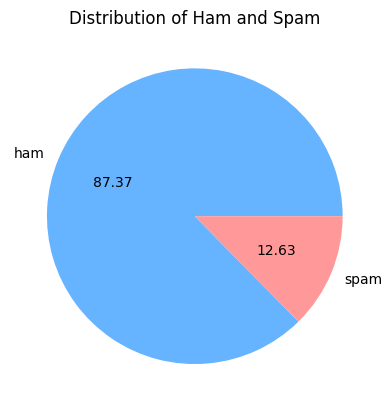

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f', colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Ham and Spam')
plt.show()

In [24]:
import nltk

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      FEATURE ENGINEERING
    </p>
  </b>
</h1>

In [26]:
df['num_char'] = df['text'].apply(len)

In [27]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      DESCRIPTIVE STATISTICS
    </p>
  </b>
</h1>

In [32]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [34]:
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [35]:
df[df['target']==1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      DATA VISUALIZATION
    </p>
  </b>
</h1>

In [36]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

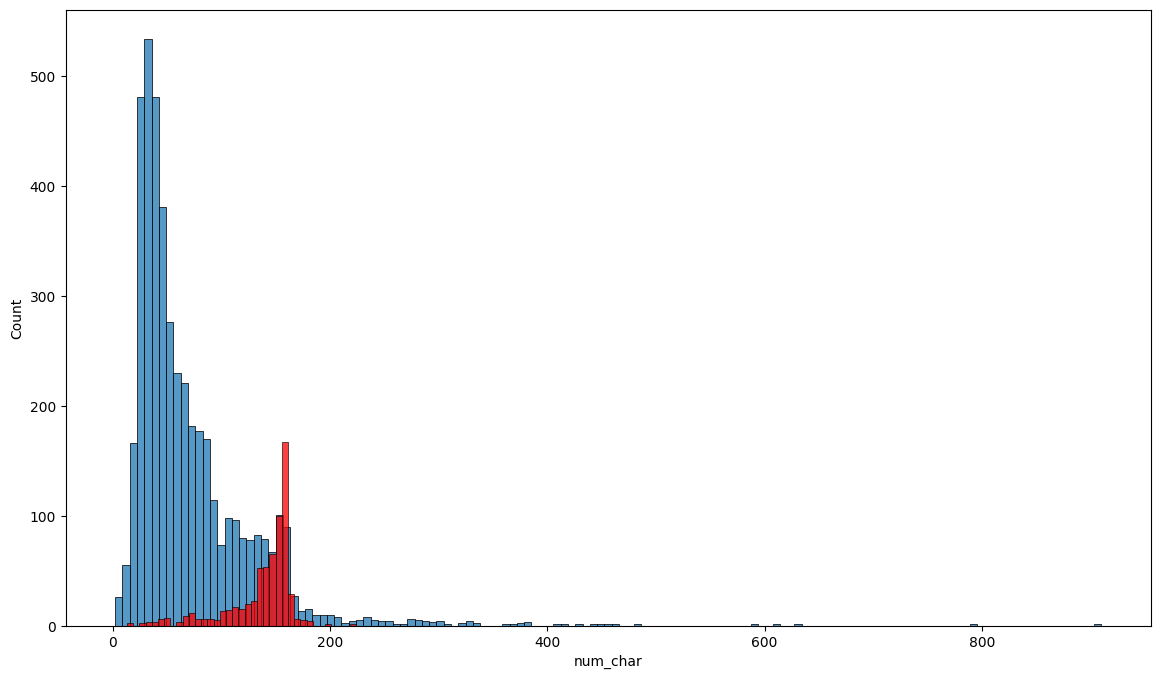

In [37]:
plt.figure(figsize=(14, 8))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color='red')

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      PAIR PLOT ANALYSIS
    </p>
  </b>
</h1>

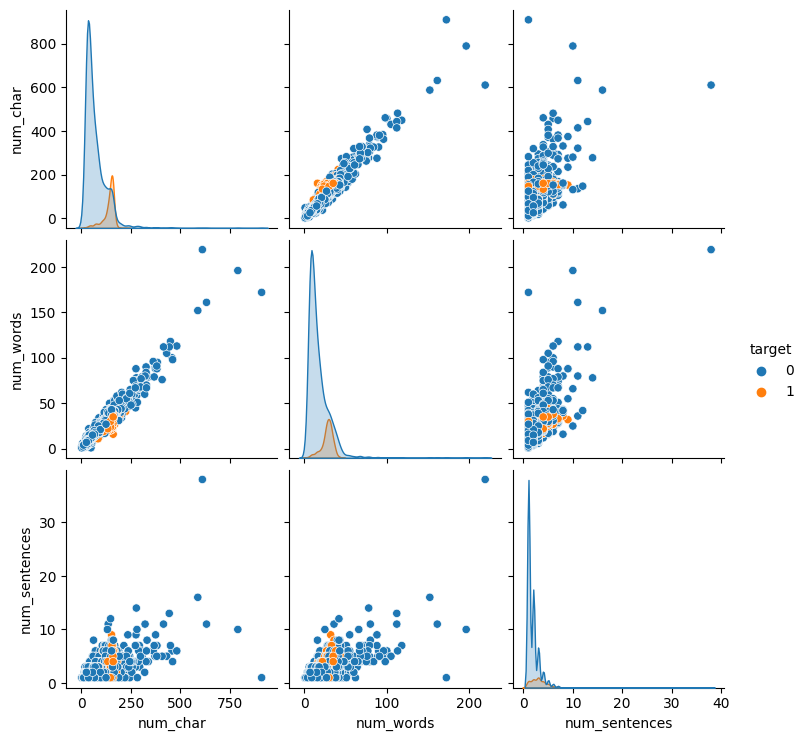

In [39]:
sns.pairplot(df, hue='target')

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      CORRELATION HEATMAP
    </p>
  </b>
</h1>

<Axes: >

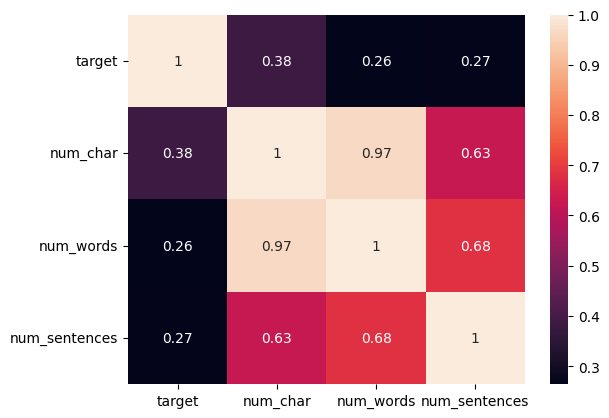

In [40]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      DATA PREPROCESSING
    </p>
  </b>
</h1>

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 10px; border: solid 2px #004080; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="color: #003366;">Feature Engineering Steps:</h3>
    <ul style="font-size: 1.2em; color: #003366;">
        <li><strong>Lower case</strong> - Converting all text to lower case for uniformity.</li>
        <li><strong>Tokenization</strong> - Splitting text into individual words or tokens.</li>
        <li><strong>Removing special characters</strong> - Eliminating characters that do not contribute to meaning.</li>
        <li><strong>Removing stop words and punctuation</strong> - Filtering out common words and punctuation that do not add significant meaning.</li>
        <li><strong>Stemming</strong> - Reducing words to their root form to standardize them.</li>
    </ul>
</div>


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
import string

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer() 
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
df['text'][432]

In [ ]:
transform_text("Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX")

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1506748686214e9df14f8);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      WORD CLOUD ANALYSIS
    </p>
  </b>
</h1>


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, min_font_size=5, background_color='black')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear', cmap='viridis')
plt.title(f'Word Cloud for Category: spam', fontsize=20, fontweight='bold', color='green')
plt.axis('off')
plt.show()

In [ ]:
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear', cmap='viridis')
plt.title(f'Word Cloud for Category: ham', fontsize=20, fontweight='bold', color='green')
plt.axis('off')
plt.show()

In [ ]:
df.head()

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      TOP WORD FREQUENCY ANALYSIS
    </p>
  </b>
</h1>

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
from collections import Counter

most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['spam word', 'count'])
sns.barplot(x='spam word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['ham word', 'count'])
sns.barplot(x='ham word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      TEXT VECTORIZATION AND MODEL BUILDING
    </p>
  </b>
</h1>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

In [ ]:
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      CLASSIFICATION MODEL TRAINING AND EVALUATION
    </p>
  </b>
</h1>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; border: solid 2px #004080; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h2 style="color: #003366;">Implementation and Evaluation</h2>
    <p style="font-size: 1.2em; color: #003366;">
        Implementation and evaluation of various classification algorithms to determine their accuracy in predicting outcomes based on provided training and testing datasets.
    </p>
    <h3 style="color: #004080;">Implemented Classifiers:</h3>
    <ul style="font-size: 1.1em; color: #003366;">
        <li>Support Vector Classifier (SVC)</li>
        <li>K-Nearest Neighbors (KNN)</li>
        <li>Naive Bayes (NB)</li>
        <li>Decision Tree (DT)</li>
        <li>Logistic Regression (LR)</li>
        <li>Random Forest (RF)</li>
        <li>AdaBoost (AdaBoost)</li>
        <li>Bagging Classifier (BgC)</li>
        <li>Extra Trees Classifier (ETC)</li>
        <li>Gradient Boosting Decision Trees (GBDT)</li>
        <li>Extreme Gradient Boosting (XGB)</li>
    </ul>
    <h3 style="color: #004080;">Function Definition:</h3>
    <p style="font-size: 1.1em; color: #003366;">
        The <code style="
            background-color: #e6e6e6;
            padding: 2px 4px;
            border-radius: 4px;
        ">train_classifier</code> function is defined to train each classifier and evaluate its accuracy on the test data. The results are collected and displayed for comparison.
    </p>
</div>


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    return accuracy

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    
    accuracy_scores.append(current_accuracy)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)

In [ ]:
performance_df

<h1>
  <b>
    <p style="background-image: url(https://images.unsplash.com/photo-1593642532973-d31b6557f0c4);
              background-size: cover;
              background-position: center;
              font-family:calibri;
              font-size:140%;
              color: #FFFFFF;
              text-align:center;
              border-radius:20px 20px 20px 20px;
              padding:20px;
              background-color: rgba(0, 102, 204, 0.8);
              border:solid 7px #FFD700;
              box-shadow: 7px 7px 7px #FFD700;
              text-shadow: 2px 2px 2px #000000;">
      VOTING CLASSIFIER
    </p>
  </b>
</h1>

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [ ]:
voting.fit(X_train, y_train)

In [ ]:
y_pred = voting.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy